### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
## Check the shape of the dataset
data.shape

(3998, 39)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

### Check Duplicates

In [5]:
data[data.duplicated(keep=False)]

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


* `There is no duplicates values are present in the dataset`

### Check Null values

In [6]:
data.isna().sum().sort_values()

Unnamed: 0               0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
CollegeCityTier          0
ElectronicsAndSemicon    0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
ComputerScience          0
nueroticism              0
CollegeCityID            0
Specialization           0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
collegeGPA               0
DOB                      0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
1

* `There is no null values are present in the dataset`

### Here `Unnamed: 0, ID,CollegeID,CollegeCityID` column is unnessary. so we will drop this column

In [7]:
data.drop(columns=['Unnamed: 0','ID','CollegeID','CollegeCityID'],axis=1,inplace=True)
data.shape

(3998, 35)

In [8]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [9]:
data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Variable Identification and Type-Casting of the columns

In [10]:
data['DOL'].head()

0                present
1                present
2                present
3                present
4    2015-03-01 00:00:00
Name: DOL, dtype: object

In [11]:
### This columns are date, so we can convert to datetime format
import datetime as dt
data['DOJ'] = pd.to_datetime(data['DOJ'])

# In DOL person don't leave that why the value is present. we replace with today datetime.
data["DOL"].replace("present",dt.datetime.today(),inplace=True)
data['DOL'] = pd.to_datetime(data['DOL'])

# Convert to datetime format
data['DOB'] = pd.to_datetime(data['DOB'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

### Extract numerical columns and categorical columns

In [13]:
numerical_columns=data.select_dtypes(include=['int64','float64'])
categorical_columns = data.select_dtypes(include='object')

In [14]:
# Numerical columns
numerical_columns.head()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,84.3,2007,95.8,2,78.00,0,2011,515,585,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,85.4,2007,85.0,2,70.06,0,2012,695,610,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,85.0,2010,68.2,2,70.00,0,2014,615,545,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,85.6,2007,83.6,1,74.64,1,2011,635,585,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,78.0,2008,76.8,2,73.90,0,2012,545,625,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
# Categorical Columns
categorical_columns.head()

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


In [16]:
# Designation columns have a get value present. check it
data[data['Designation']=='get']

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
4,200000,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
332,180000,2013-08-01,2014-03-01 00:00:00.000000,get,-1,m,1990-08-02,91.80,cbse,2008,...,-1,553,-1,-1,-1,-0.1590,0.8784,0.3174,0.27270,0.4805
350,340000,2010-07-01,2011-05-01 00:00:00.000000,get,Faridabad,m,1988-08-13,67.67,up board,2004,...,-1,-1,-1,-1,-1,-1.9629,-1.0593,-0.7794,-0.17270,-0.1295
1717,145000,2012-10-01,2013-01-01 00:00:00.000000,get,Hyderabad,m,1991-07-29,80.00,ssc,2008,...,-1,306,-1,-1,-1,1.5533,1.7488,1.6880,-1.14220,0.1864
1897,175000,2014-05-01,2024-02-22 23:36:44.661308,get,Hyderabad,m,1991-02-04,87.00,state board,2009,...,-1,346,-1,-1,-1,1.5644,-1.1196,0.4711,1.16010,0.4805
2140,600000,2014-06-01,2024-02-22 23:36:44.661308,get,Indore,m,1992-01-05,91.20,cbse,2010,...,-1,420,-1,-1,-1,-1.4517,0.0459,-1.6807,0.90660,0.0973
2318,220000,2014-07-01,2024-02-22 23:36:44.661308,get,Lucknow,m,1992-02-06,80.20,cbse,2009,...,-1,-1,580,-1,-1,1.4208,1.0449,-0.4511,0.01920,0.6721
2443,110000,2014-10-01,2015-04-01 00:00:00.000000,get,kharagpur,m,1993-03-18,80.00,icse,2010,...,-1,346,-1,-1,-1,-0.4463,-0.9531,0.1637,0.01920,-2.0105
2666,200000,2010-03-01,2011-03-01 00:00:00.000000,get,Hyderabad,m,1989-05-15,80.00,ssc,2007,...,-1,-1,-1,-1,-1,-0.4173,0.3448,0.3817,-0.64280,0.9763
2757,350000,2015-01-01,2024-02-22 23:36:44.661308,get,Nashik,m,1994-01-17,90.60,cbse,2011,...,-1,500,-1,-1,-1,0.1282,0.2124,-1.2196,-0.99500,-0.2859


## 1. Univariate Analysis

### A. Categorical Columns

In [17]:
## Define the function which give the Non-Vizualization of categorical columns
def categorical_univariate_analysis(discrete_data):
    for col_name in categorical_columns:
        print("*"*15, col_name, "*"*15)
        print(categorical_columns[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', categorical_columns[col_name].value_counts())
        print()

In [18]:
# pd.set_option('display.max_rows', None)

In [19]:
categorical_univariate_analysis(categorical_columns)

*************** Designation ***************
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 
 software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

*************** JobCity ***************
count                                                   3998
nunique                                                  339
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
Name

### Observation: 
  * **Designation:** In the "Designation" column, if the value **`get`** is present, which is unfamiliar, we will handle it by filling this value with the mode of the column. Additionally, where values include **`Software Engineer`** or **`Senior Engineer`**, we will combine them into one category, namely **`Software Engineer`**. Similarly, for **`Software Developer`** and **`System Engineer`**, we'll merge them into their respective single categories..
  * **JobCity:** In this JobCity Columns `-1` value is present. This will happen when person not enter the JobCity. So, we treat this value according to fill with mode. And some people enter the name of the JobCity in Capital Letter, small letter or mis spell these are the same City name but it entered in different format. So, we fixed using Levenshtein distance.
  * **Gender:** In the Gender column we have most of the value are `Male` and few are `Female`.
  * **10board and 12board:** In this column we see that the most of the the student are from `State Board` if we combine all the state board, and we can also see that the some `0` value are present. This is due to Student are not entering their `10Board and 12board.` so, we fill this value mode And replacing the redundant values of the and 12 board column with 'state','cbse','icse'.
  * **Degree:** In the Degree columns we can see that the Most of the students are Pursuing the Degree in `B.Tech/B.E.` and `M.Sc. (Tech.)` are the few which are outliers.
  * **Specialization:** In the Specialization columns we see that the Most of the Specialization is in Electronics and communication engineering and some value are filled with Other.
  * **CollegeState:** In the CollegeState we see that the most of the Student are from `Uttar Pradesh`. Least are `Goa, Sikkim, Meghalaya` and these because in this state don't have much university and colleges.

#### In the "Designation" column, values such as "Software Engineer" or "Senior Engineer" will be combined into a single category, which is "Software Engineer". Similarly, "Software Developer" and "System Engineer" will be unified under "Software Engineer".


In [20]:
data['Designation']=data['Designation'].str.replace('.*software engineer.*', 'Software Engineer', case=False,regex=True)
data['Designation'] = data['Designation'].str.replace('.*systems? engineer.*', 'System Engineer', case=False,regex=True)
data['Designation']=data['Designation'].str.replace('.*software developer.*', 'Software Developer', case=False,regex=True)
data['Designation'] = data['Designation'].str.replace('.*support engineer.*','Support Engineer',case=False,regex=True)
data['Designation'] = data['Designation'].str.replace('.*(quality assurance|qa|QA Engineer|software test engineer).*', 'Software Test Engineer', case=False,regex=True)

In [21]:
data['Designation'].value_counts()

Software Engineer         816
System Engineer           399
Software Developer        295
Software Test Engineer    201
programmer analyst        139
                         ... 
senior risk consultant      1
cad drafter                 1
noc engineer                1
human resources intern      1
research scientist          1
Name: Designation, Length: 370, dtype: int64

In [22]:
# !pip install python-Levenshtein
# ! pip install fuzzywuzzy

#### In JobCity, we have city names written with capital letters, lowercase letters, and misspelled. We will convert them into a unified city name using the Levenshtein distance.

* **`python-Levenshtein`** is a Python extension module that provides functions to compute the Levenshtein distance between two strings. The **Levenshtein distance**, also known as the edit distance, is a measure of the **similarity between two strings by counting the minimum number of single-character edits** (insertions, deletions, or substitutions) required to change one string into the other.

In [23]:
### using Levenshtein distance we find the similarity between the jobcity name
from fuzzywuzzy import process

def correct_spelling_errors(target_words,choices=[],thershold=75):
    match, score = process.extractOne(target_words,choices)
    if score>=thershold:
        return match
    else:
        return target_words


* **`target_words:`** The word you want to check for spelling errors or find a close match for.
* **`choices:`** A list of candidate words to compare against target_words.
* **`threshold:`** The minimum similarity score (in percentage) required for a match to be considered acceptable. If the best match's similarity score is below this threshold, the function returns the original word without correction.

In [24]:
## Correct Spelling of the City name
choice = ['Bangalore','Indore','Chennai','Gurgaon','Manesar','Hyderabad','Noida','Kolkata','Pune',
          'Mohali','Jhansi','Delhi','New Delhi','Noida','Bhubaneswar','Navi Mumbai','Mumbai','Mangalore','Rewari',
          'Ghaziabad','Bhiwadi','Mysore','Rajkot','Noida','Jaipur','Thane','Maharajganj',
          'Thiruvananthapuram','Panchkula','Coimbatore','Dhanbad','Lucknow','Gandhi Nagar','Una',
         'Daman and Diu','Visakhapatnam','Nagpur','Bhagalpur','Ahmedabad','Kochi','Bankura',
         'Kanpur','Vijayawada','Beawar','Alwar','Siliguri','Bhopal','Faridabad','Jodhpur','Udaipur',
         'Muzaffarpur','Unnao','Bulandshahr','Haridwar','Raigarh','Jabalpur','Aurangabad','Belgaum',
         'Dehradun','Rudrapur','Jamshedpur','Vizag','Dharamshala','Hissar','Ranchi','Madurai','Chandigarh',
         'Australia','Cheyyar','Sonipat','PantNagar','Siliguri','Jagdalpur','angul','Baroda','ariyalur',
         'Jowai','Neemrana','Vizag','Tirupati','Calicut','Dubai','Nashik','Bellary','Ludhiana','Bhopal',
          'Gagret','Indirapuram','Gwalior','Rajasthan','Bareilly','Hosapete','Miryalaguda','Dharuhera',
         'Meerut','Dehradun','Ganjam','Hubli','Navi Mumbai','Agra','Trichy','Kudankulam','tarapur','Ongole',
         'Sambalpur','Pondicherry','Bundi','Sadulpur','Rajgarh','Churu','Bikaner','Vadodara','Asansol',
          'Tirunelvelli','Ernakulam','Bilaspur','Chandrapur','Nanded','Dharmapuri','Nasik','Techonpark',
          'Bharuch','Tornagallu','Shimla','Jaspur','Burdwan','Jammu','Shahdol','Muvattupuzha',
          'Al Jubail','Saudi Arabia','Kalmar','Sweden','Secunderabad','Ratnagiri','Jhajjar','Gulbarga',
          'Nalagarh','Patna','Shahdol','Jamnagar','Gonda','Orissa','Kharagpur','Joshimath','Bathinda',
          'Johannesburg','Karnal','London','Kota','Tamil Nadu','Durgapur','Pondi','Nellore','Surat',
          'Kurnool','Kolhapur','Madurai','Bhilai','Bahadurgarh','Rayagada','Odisha','Kakinada',
          'Varanasi','Sahibabad','Howrah','Ambala','Khopoli','Roorkee','Allahabad','Ranchi',
          'Jalandhar','Manesar','Vapi','Pilani','Muzzafarpur','RAS AL KHAIMAH','Bihar','Singaruli',
          'Phagwara','Baripad','Yamuna Nagar','Sampla','Rourkela','Dausa','Latur','Karnal','Haldia',
          'Rai Bareli','Patiala','Gorakhpur','karad','Rajpura','Haryana']

In [25]:
## apply the method on JobCity Column
data['JobCity']= data['JobCity'].apply(lambda x:correct_spelling_errors(x,choices=choice)if isinstance(x, str) else x)

In [26]:
data['JobCity'].nunique()

190

In [27]:
categorical_columns.head()

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


#### In the 10th-grade columns, we will combine all the state boards into one state board.

In [28]:
replace_state_board=['board ofsecondary education,ap',
                     'mp board bhopal',
                    'karnataka secondary school of examination',
                    'kerala state technical education',
                    'bseb',
                    'state board of secondary education, andhra pradesh',
                    'gujarat state board',
                    'karnataka state board',
                    'wbbse','maharashtra state board','icse board',
                    'up board',
                    'board of secondary education(bse) orissa',
                    'little jacky matric higher secondary school',
                    'uttar pradesh board','bsc,orissa','mp board','upboard',
                    'kseeb','j & k bord','rbse','central board of secondary education',
                    'pseb','jkbose','haryana board of school education,(hbse)','ms board',
                    'stateboard','karnataka secondary education board',
                    'mumbai board','sslc','kseb','west bengal board of secondary education',
                     'jharkhand secondary examination board,ranchi','u p board',
                     'bseb,patna','hsc','bse','sss pune','karnataka education board (keeb)',
                     'kerala','state board of secondary education( ssc)',
                     'gsheb','up(allahabad)','nagpur','don bosco maatriculation school',
                     'karnataka state secondary education board','maharashtra'
                     'karnataka secondary education board',
                     'himachal pradesh board of school education',
                     'certificate of middle years program of ib',
                     'karnataka board of secondary education','board of secondary education rajasthan',
                     'ua', 'board of secendary education orissa',
                     'karantaka secondary education and examination borad', 'hbsc',
                     'kseeb(karnataka secondary education examination board)',
                     'hbse', 'state(karnataka board)',
                     'jharkhand accademic council',
                     'jharkhand secondary examination board (ranchi)',
                     'karnataka secondary education examination board',
                     'mirza ahmed ali baig' ,'jseb', 'bse, odisha', 'bihar board',
                     'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
                     'upbhsie', 'secondary board of rajasthan',
                     'tamilnadu matriculation board', 'jharkhand secondary board',
                     'board of secondary education,andhara pradesh', 'up baord',
                     'state', 'board of intermediate education',
                     'state board of secondary education,andhra pradesh',
                     'up board , allahabad',
                     'stjosephs girls higher sec school,dindigul', 'maharashtra board',
                     'education board of kerala', 'board of ssc',
                     'maharashtra state board pune',
                     'board of school education harayana',
                     'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
                     'bihar examination board, patna', 'latur',
                     'board of secondary education, rajasthan', 'state borad hp',
                     'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
                     'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
                     'karnataka education board', 'mhsbse',
                     'karnataka sslc board bangalore', 'karnataka', 'u p',
                     'secondary school of education', 'state board of karnataka',
                     'karnataka secondary board', 'andhra pradesh board ssc',
                     'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
                     'hse,orissa', 'national public school', 'nagpur board',
                     'jharkhand academic council', 'bsemp',
                     'board of secondary education, andhra pradesh',
                     'board of secondary education orissa',
                     'board of secondary education,rajasthan(rbse)',
                     'board of secondary education,ap',
                     'board of secondary education,andhra pradesh',
                     'jawahar navodaya vidyalaya', 'aisse',
                     'karnataka board of higher education',
                     'bihar', 'kerala state board', 'tn state board',
                    'kolhapur divisional board, maharashtra',
                    'bharathi matriculation school', 'uttaranchal state board',
                    'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
                    'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
                    'msbshse,pune', 'tamilnadu state board', 'kerala university',
                    'uttaranchal shiksha avam pariksha parishad',
                    'bse(board of secondary education)',
                    'bright way college, (up board)',
                    'school secondary education, andhra pradesh',
                    'secondary state certificate',
                    'maharashtra state board of secondary and higher secondary education,pune',
                    'andhra pradesh state board', 'stmary higher secondary',
                    'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
                    'pune board', 'board of secondary education,orissa',
                    'maharashtra state board,pune', 'up bord',
                    'kiran english medium high school', 'state board (jac, ranchi)',
                    'gujarat board', 'state board ', 'sarada high scchool'
                     'kalaimagal matriculation higher secondary school',
                     'karnataka board', 'maharastra board', 'sslc board',
                     'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
                     'bihar secondary education board,patna',
                     'haryana board of school education',
                     'sri kannika parameswari highier secondary school, udumalpet',
                     'ksseb(karnataka state board)', 'nashik board',
                     'jharkhand secondary education board', 'himachal pradesh board',
                     'maharashtra satate board',
                     'maharashtra state board mumbai divisional board',
                     'dav public school,hehal',
                     'state board of secondary education, ap',
                     'rajasthan board of secondary education', 'hsce',
                     'karnataka secondary education',
                     'board of secondary education,odisha', 'maharashtra nasik board',
                     'west bengal board of secondary examination (wbbse)',
                     'holy cross matriculation hr sec school', 'apssc',
                     'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
                     'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
                     'rbse,ajmer', 'board of secondaray education',
                     'secondary school education', 'state bord', 'jbse,jharkhand',
                     'hse', 'madhya pradesh board', 'bihar school examination board',
                     'west bengal board of secondary eucation', 'state boardmp board ',
                     'board of secondary education (bse) orissa',
                     'maharashtra state board for ssc',
                     'board of secondary school education', 'latur board',
                     "stmary's convent inter college", 'nagpur divisional board',
                     'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
                     'bihar school examination board patna', 'cbse board',
                     'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
                     'board of school education haryana',
                     'council for indian school certificate examination',
                     'aurangabad board', 'j&k state board of school education',
                     'maharashtra state board of secondary and higher secondary education',
                     'maharashtra state boar of secondary and higher secondary education',
                     'ssc regular',
                     'karnataka state examination board', 'nasik',
                     'west bengal  board of secondary education', 'up board,allahabad',
                     'bseb ,patna',
                     'state board - west bengal board of secondary education : wbbse',
                     'maharashtra state board of secondary & higher secondary education',
                     'delhi public school', 'karnataka secondary eduction',
                     'secondary education board of rajasthan',
                     'maharashtra board, pune', 'rbse (state board)', 'apsche',
                     'board of  secondary education',
                     'board of high school and intermediate education uttarpradesh',
                     'kea', 'board of secondary education - andhra pradesh',
                     'ap state board for secondary education', 'seba',
                     'punjab school education board, mohali',
                     'jharkhand acedemic council', 'hse,board',
                     'board of ssc education andhra pradesh', 'up-board', 'bse,odisha',
                     'kalaimagal matriculation higher secondary school','state board',
                     'karnataka secondory education board',
                     'karnataka state education examination board',
                     'up','ssc','uttarakhand board','board of secondary education',
                     'sarada high scchool','maharashtra',
                    ]

In [29]:
## Replace the all the state board with one state board
for i in replace_state_board:
    data['10board'].replace(i,'State Board',inplace=True)
    
## Replace all the cbse and delhi board to cbse Board
replace_board_cbse=['cbse', 'all india board', 'central board of secondary education, new delhi', 'cbese','cgbse','cbse[gulf zone]','cbsc','delhi board','cbse ']
for i in replace_board_cbse:
    data['10board'].replace(i,'CBSE Board',inplace=True)


## Replace all the icse board to icse board
replace_board_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse','isc board , new delhi','icse board , new delhi']
for i in replace_board_icse:
    data['10board'].replace(i,'ICSE Board',inplace=True)


## Replace all the matriculation value to 0
replace_state_matriculation=['matriculation','matriculation board','metric','maticulation','board secondary  education','matric board']
for i in replace_state_matriculation:
    data['10board'].replace(i,0,inplace=True)


## Unique value in 10board
data['10board'].unique()

array(['State Board', 'CBSE Board', 'ICSE Board', 0], dtype=object)

####  In the 12th-grade columns, we will combine all the state boards into one state board.

In [30]:
data['12board'].value_counts()

cbse                                1400
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [31]:
replace_state_board=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','intermideate','up bord','andhra pradesh state board','gujarat board']

In [32]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' 
for i in replace_state_board:
    data['12board'].replace(i,'State Board',inplace=True)

replace_board_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_board_cbse:
    data['12board'].replace(i,'CBSE Board',inplace=True)

replace_board_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_board_icse:
    data['12board'].replace(i,'ICSE Board',inplace=True)

data['12board'].unique()

array(['State Board', 'CBSE Board', 'ICSE Board', 0], dtype=object)

#### In the Specialization columns, we will combine all the specialization into Electronic Communication,Computer Science,Mechanical Engineer,etc.

In [33]:
# ComputerProgramming,
# ElectronicsAndSemicon,
# ComputerScience,
# MechanicalEngg,
# ElectricalEngg,
# TelecomEngg,
# CivilEngg

In [34]:
## combine the specialization with EC, CS, ME,etc.
specialization_map = \
{'electronics and communication engineering' : 'Electronic Communication',
 'computer science & engineering' : 'Computer Science',
 'information technology' : 'Computer Science' ,
 'computer engineering' : 'Computer Science',
 'computer application' : 'Computer Science',
 'mechanical engineering' : 'Mechanical Engineer',
 'electronics and electrical engineering' : 'Electronic Communication',
 'electronics & telecommunications' : 'Electronic Communication',
 'electrical engineering' : 'Electrical Engineer',
 'electronics & instrumentation eng' : 'Electronic Communication',
 'civil engineering' : 'Civil Engineer',
 'electronics and instrumentation engineering' : 'Electronic Communication',
 'information science engineering' : 'Computer Science',
 'instrumentation and control engineering' : 'Electronic Communication',
 'electronics engineering' : 'Electronic Communication',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'Electronic Communication',
 'computer science and technology' : 'Computer Science',
 'telecommunication engineering' : 'Electronic Communication',
 'mechanical and automation' : 'Mechanical Engineer',
 'automobile/automotive engineering' : 'Mechanical Engineer',
 'instrumentation engineering' : 'Electronic Communication',
 'mechatronics' : 'Mechanical Engineer',
 'electronics and computer engineering' : 'Computer Science',
 'aeronautical engineering' : 'Mechanical Engineer',
 'computer science' : 'Computer Science',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'Electronic Communication',
 'electrical and power engineering' : 'Electrical Engineer',
 'industrial & management engineering' : 'other',
 'computer networking' : 'Computer Science',
 'embedded systems technology' : 'Electronic Communication',
 'power systems and automation' : 'Electrical Engineer',
 'computer and communication engineering' : 'Computer Science',
 'information science' : 'Computer Science',
 'internal combustion engine' : 'Mechanical Engineer',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'Mechanical Engineer',
 'control and instrumentation engineering' : 'Electronic Communication',
 'polymer technology' : 'other',
 'electronics' : 'Electronic Communication'}

In [35]:
data['Specialization'] = data['Specialization'].map(specialization_map)
data['Specialization'].unique()

array(['Computer Science', 'Electronic Communication',
       'Mechanical Engineer', 'Electrical Engineer', 'Civil Engineer',
       'other'], dtype=object)

#### Fill the -1,0, and `get` value with mode value.

In [36]:
## Replace all the 'get' values with the mode values.
data['Designation'].replace("get",data['Designation'].mode()[0],inplace=True)

## Replace all the -1 value with the mode values.
data['JobCity'].replace(-1,data['JobCity'].mode()[0],inplace=True)

## Replace all the 0 value with the mode values.
data['10board'].replace(0,data['10board'].mode()[0],inplace=True)
data['12board'].replace(0,data['12board'].mode()[0],inplace=True)

### Categorical Univariate Analysis- Visuals 

In [37]:
def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    nrows = (size + 1) // 2  # Calculate number of rows needed
    plt.figure(figsize=(14, 5 * nrows), dpi=100)  # Adjust figure size based on the number of rows

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(nrows, 2, j + 1)  # Adjust subplot position based on number of rows
        sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=13)
        plt.ylabel('{}'.format(i), fontsize=13)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count),fontsize=15)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


In [38]:
categorical_columns=data.select_dtypes(include=['object'])
# # categorical_columns.head()

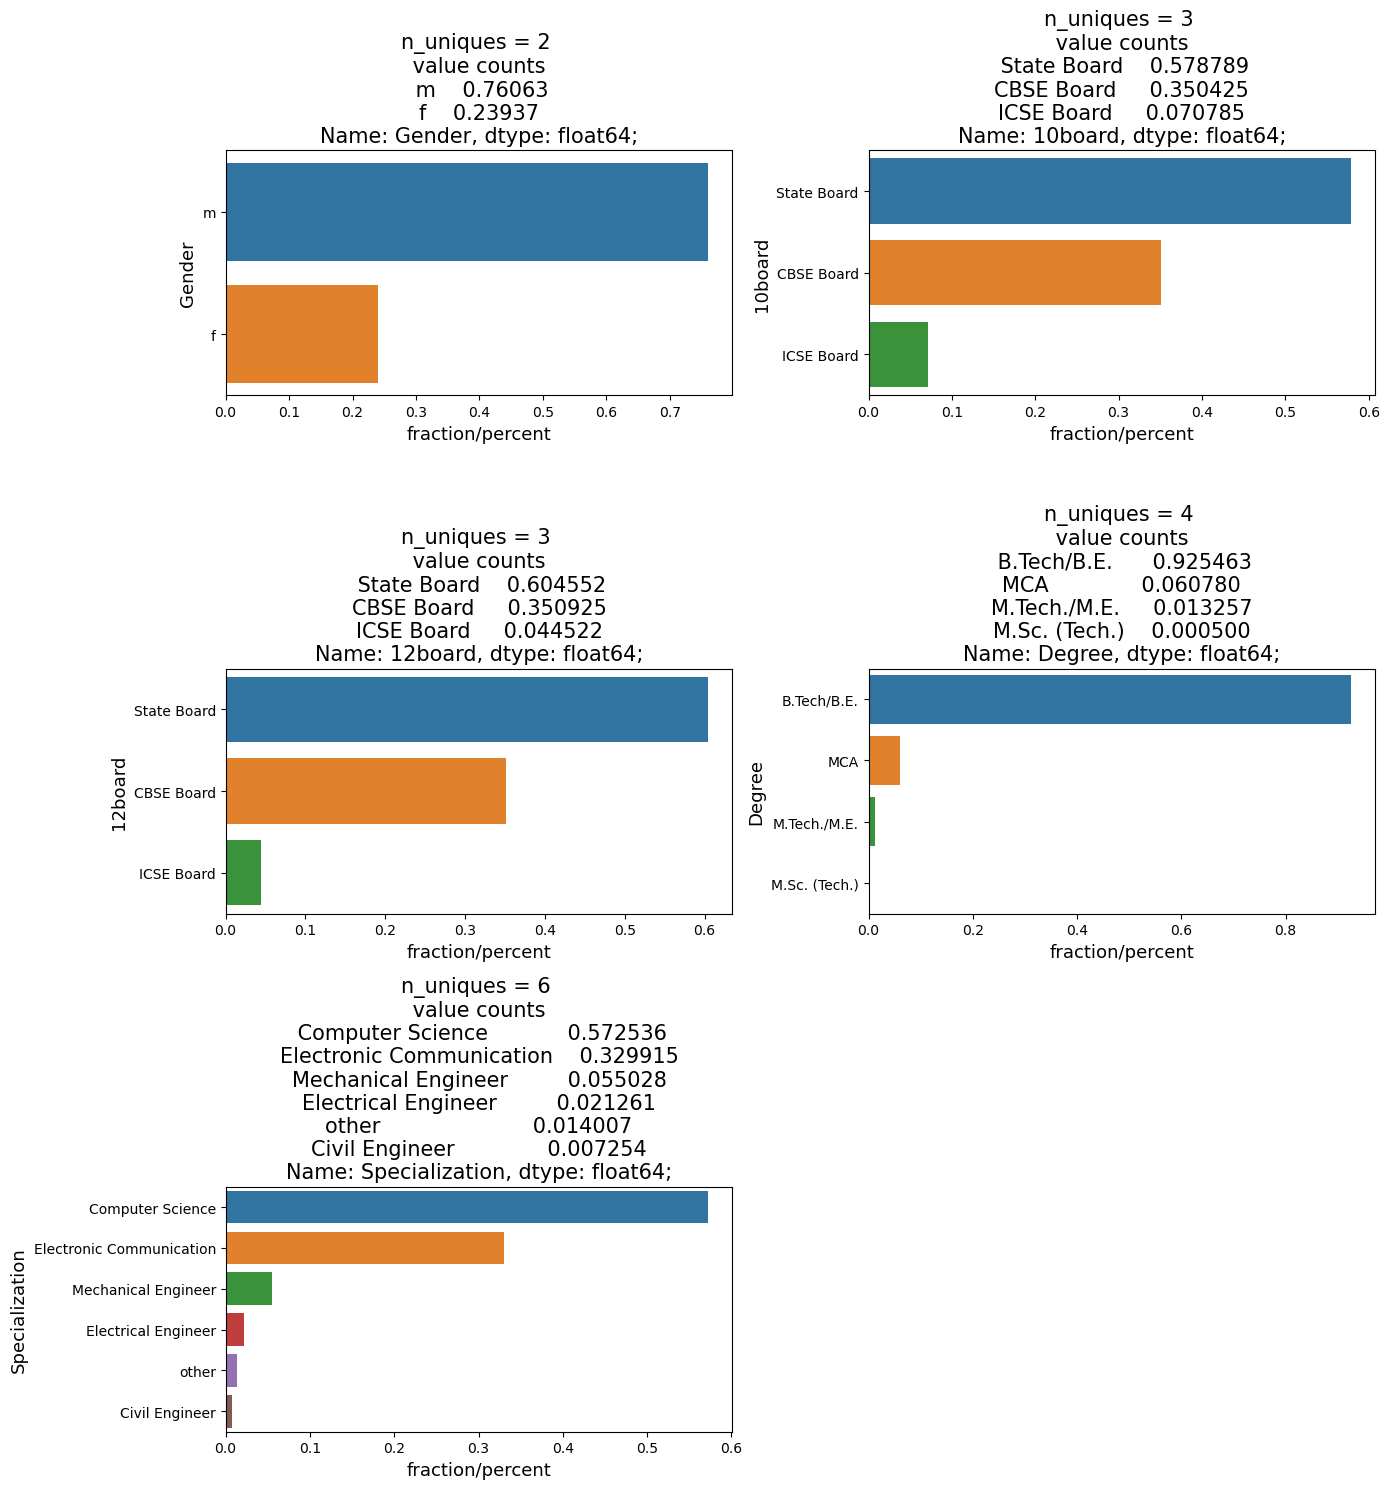

In [39]:
 UVA_category(categorical_columns, ['Gender','10board','12board','Degree','Specialization'])

### Numerical Univariate Analysis

In [40]:
# def numerical_univariate_analysis(numerical_data):
#     for col_name in numerical_data:
#         print("*"*10, col_name, "*"*10)
#         print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std','skew','kurt']))
#         print()

In [41]:
numerical_columns.head()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,84.3,2007,95.8,2,78.00,0,2011,515,585,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,85.4,2007,85.0,2,70.06,0,2012,695,610,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,85.0,2010,68.2,2,70.00,0,2014,615,545,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,85.6,2007,83.6,1,74.64,1,2011,635,585,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,78.0,2008,76.8,2,73.90,0,2012,545,625,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Numerical Univariate- Visual Analysis

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def UVA_numeric(data, var_group):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    nrows = (size + 1) // 2  # Calculate number of rows needed
    plt.figure(figsize=(14, 6 * nrows), dpi=100)

    # looping for each variable
    for j, i in enumerate(var_group):

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(nrows, 2, j + 1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(x=points, y=[0, 0], color='black', label="std_dev")
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label="min/max",s=100)
        sns.scatterplot(x=[mean], y=[0], color='red', label="mean",s=100)
        sns.scatterplot(x=[median], y=[0], color='blue', label="median",s=100)
        plt.xlabel('{}'.format(i), fontsize=15)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)),fontsize=15)

    plt.tight_layout()
    plt.show()

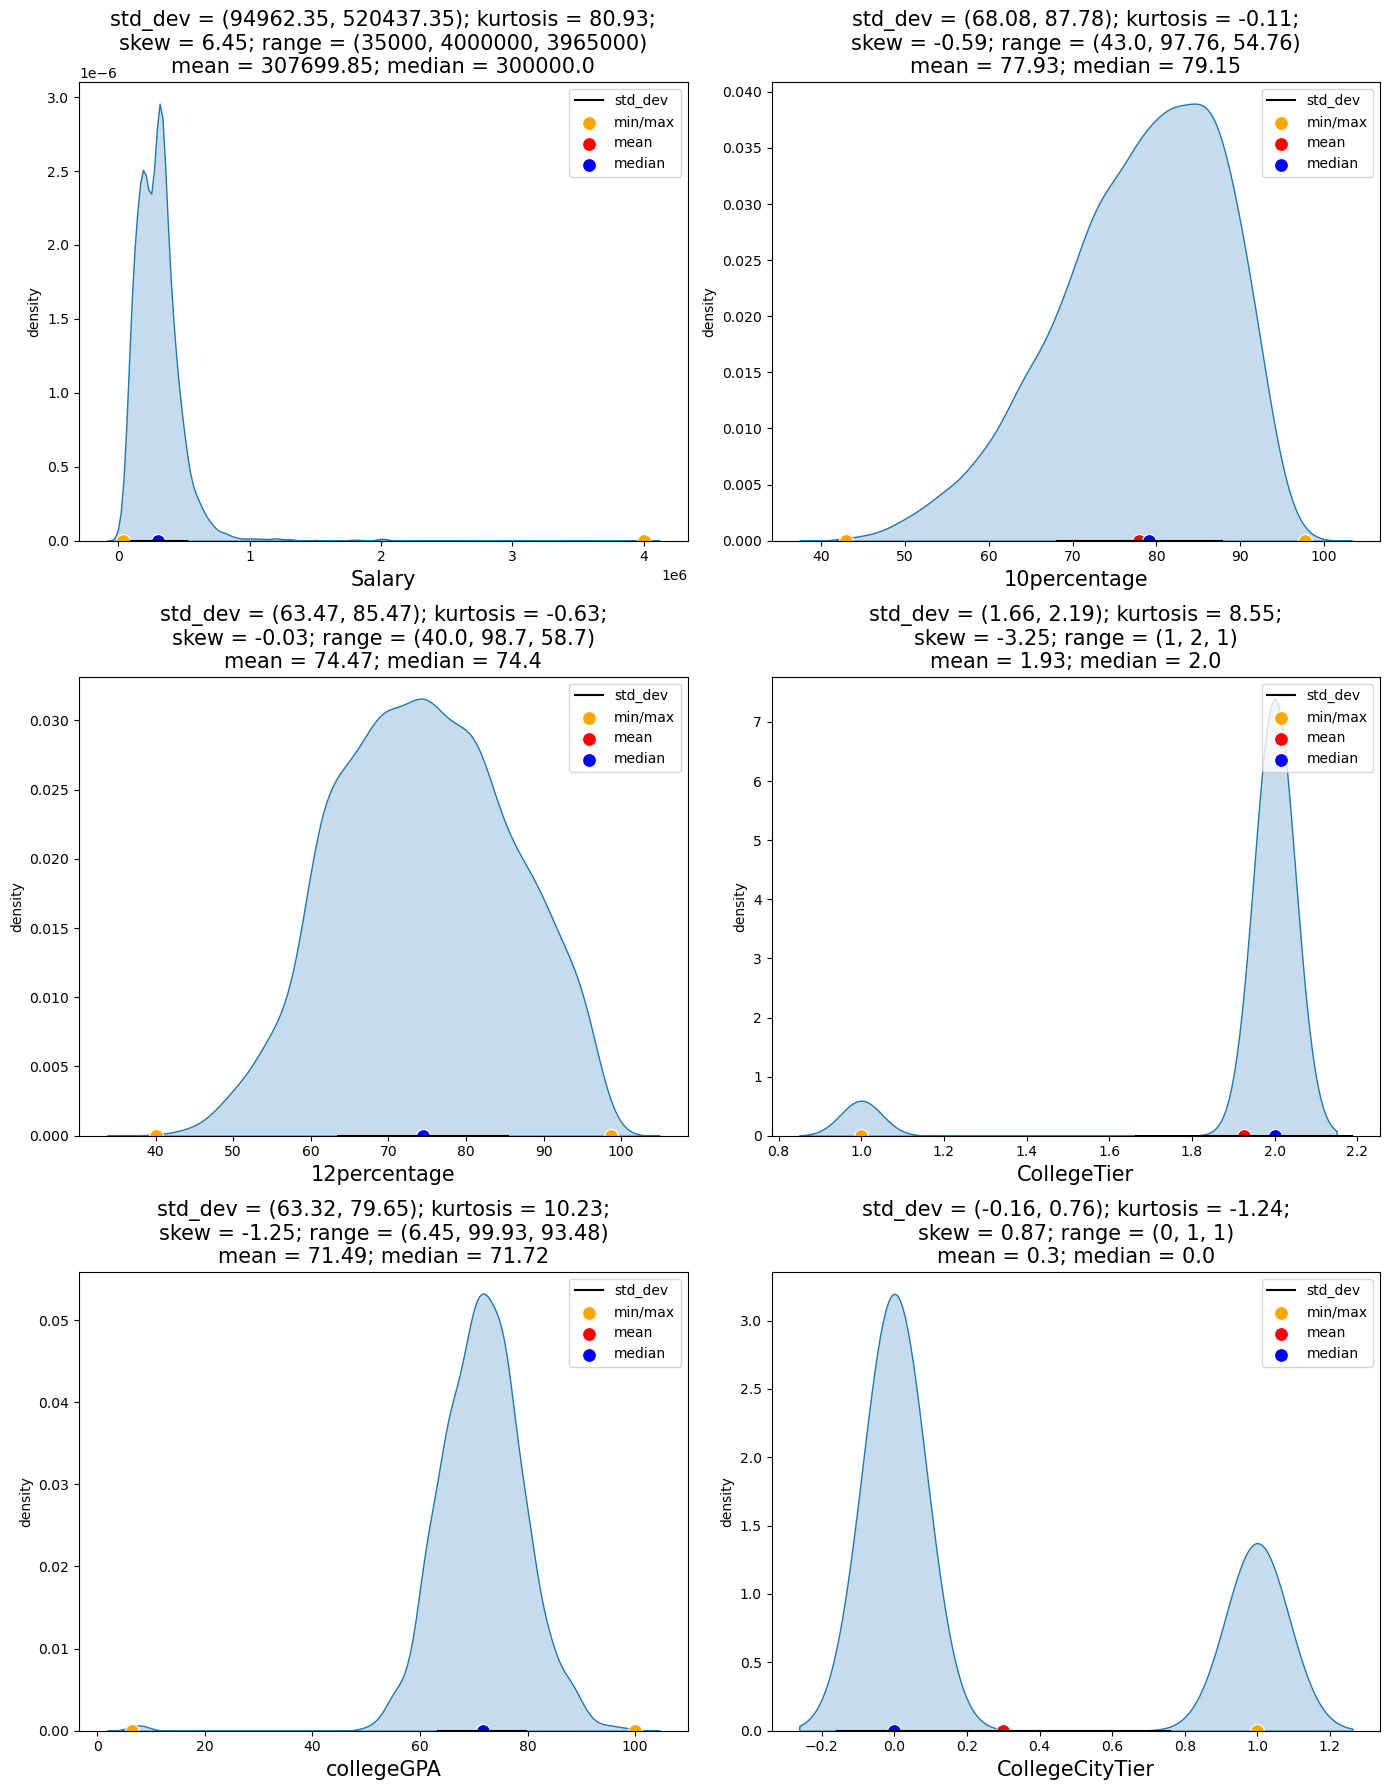

In [43]:
UVA_numeric(numerical_columns,['Salary','10percentage','12percentage','CollegeTier','collegeGPA','CollegeCityTier'])

### Observation:
   * **1. Salary**: 
        * Median: Salary is 300000.
        * Skewness +6.45 : Salary is highly skewed towards the right.
        * kurtosis +80.93 : very high likely to have extreme/outlier values.
   * **2. 10percentage:**
        * Median: 10% is 79.5
        * Skewness -0.59: this is less skewed to the left.
        * Kurtosis -0.11: very less likely to have extream/outlier values.
   * **3. 12percentage:**
        * Median: 12% is 74.4%
        * Skewness -0.03: this is negligibly skewed to the left.
        * **Kurtosis** -0.63: very less likely to have extream/outlier values.
   * **4. CollegeGPA:**
        * Median: CollegeGPA is 71.72
        * Skewness -1.25: this is less skewed to the left.
        * Kurtosis 10.23: very highly likely to have extream/outlier values.
  

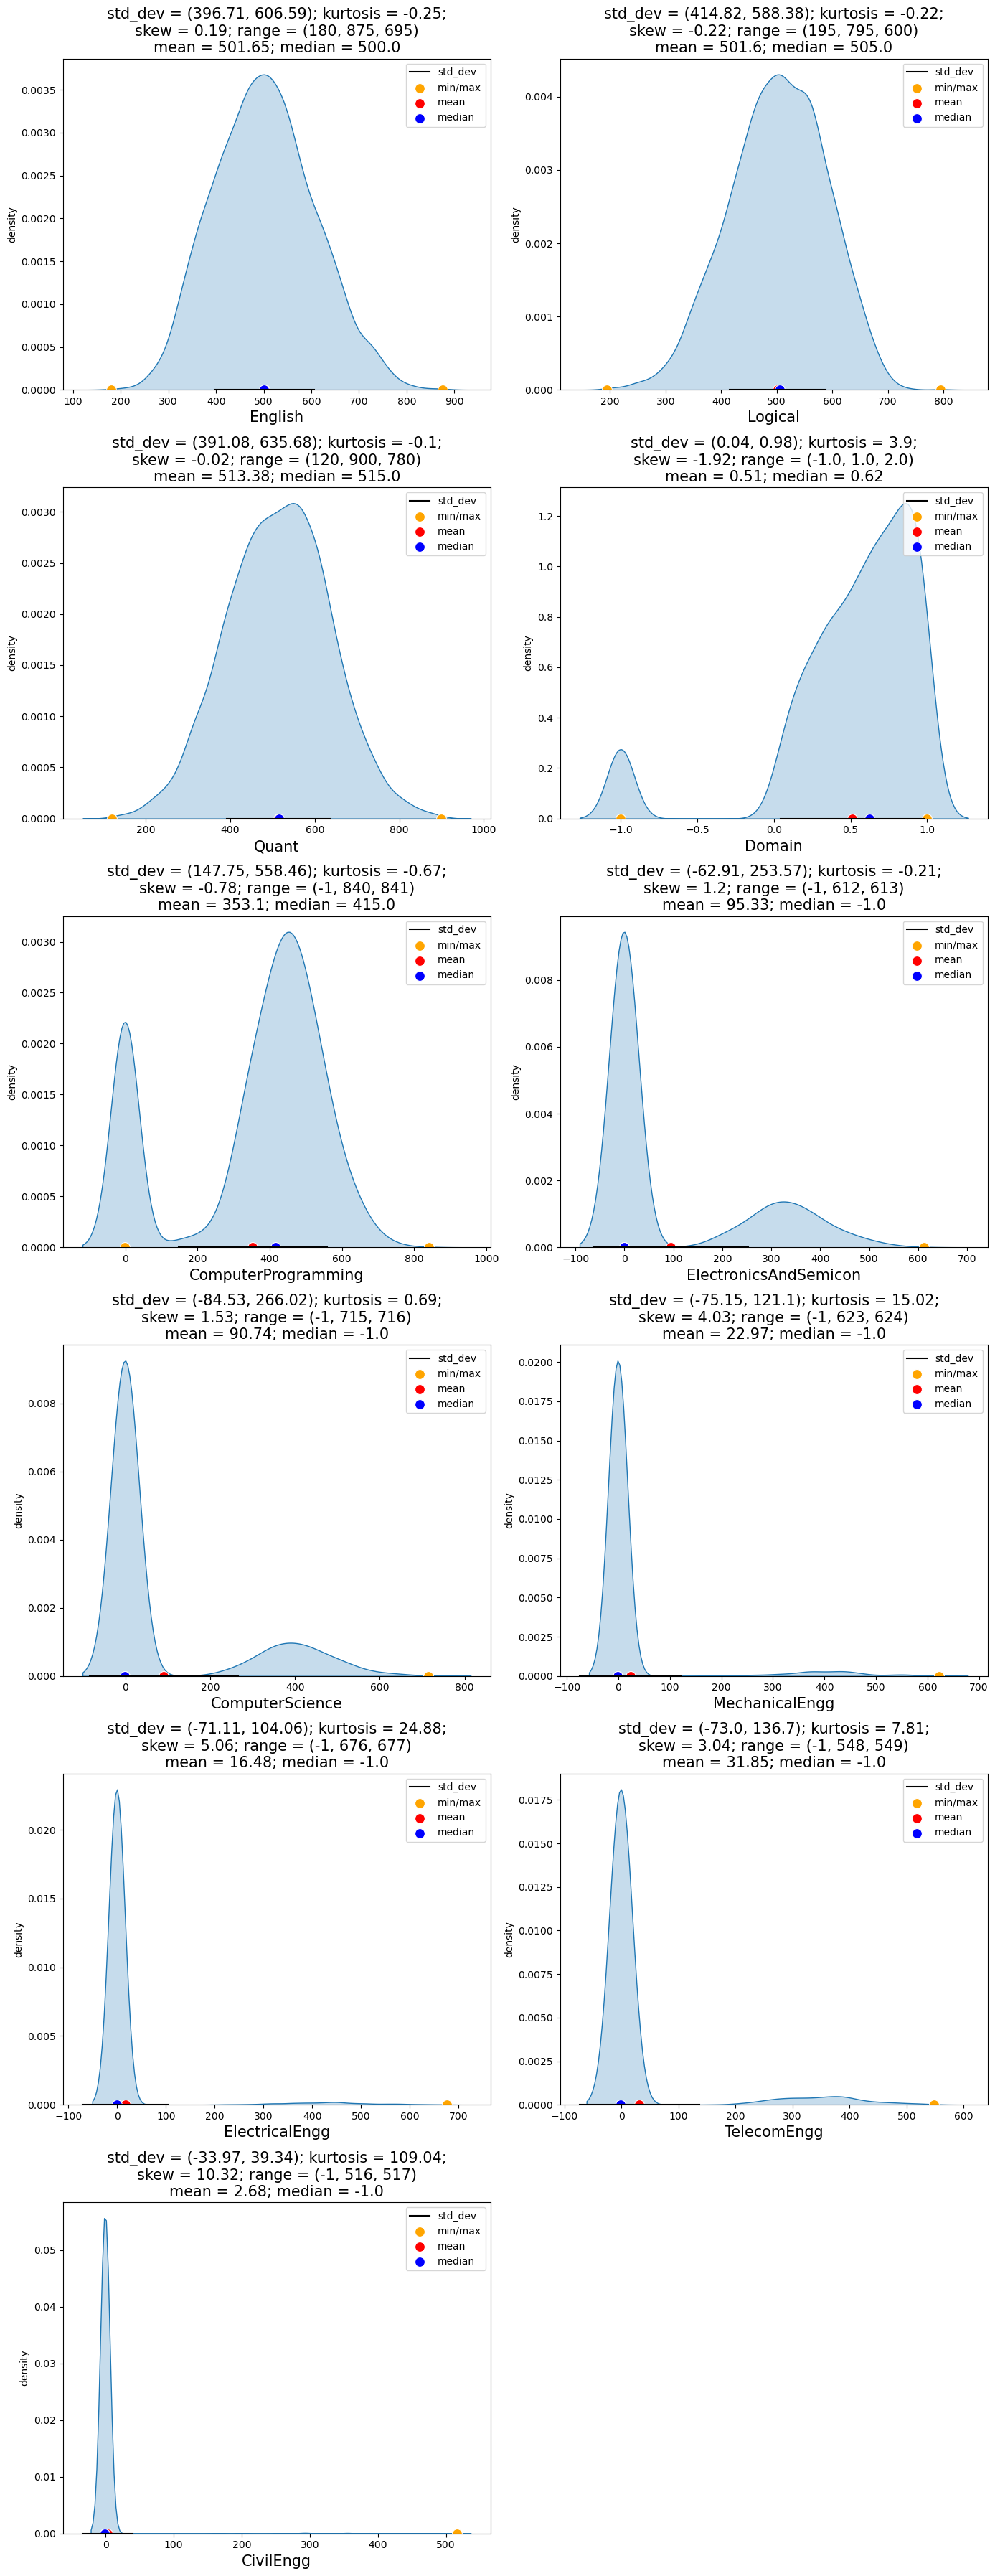

In [44]:
UVA_numeric(numerical_columns,['English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'])

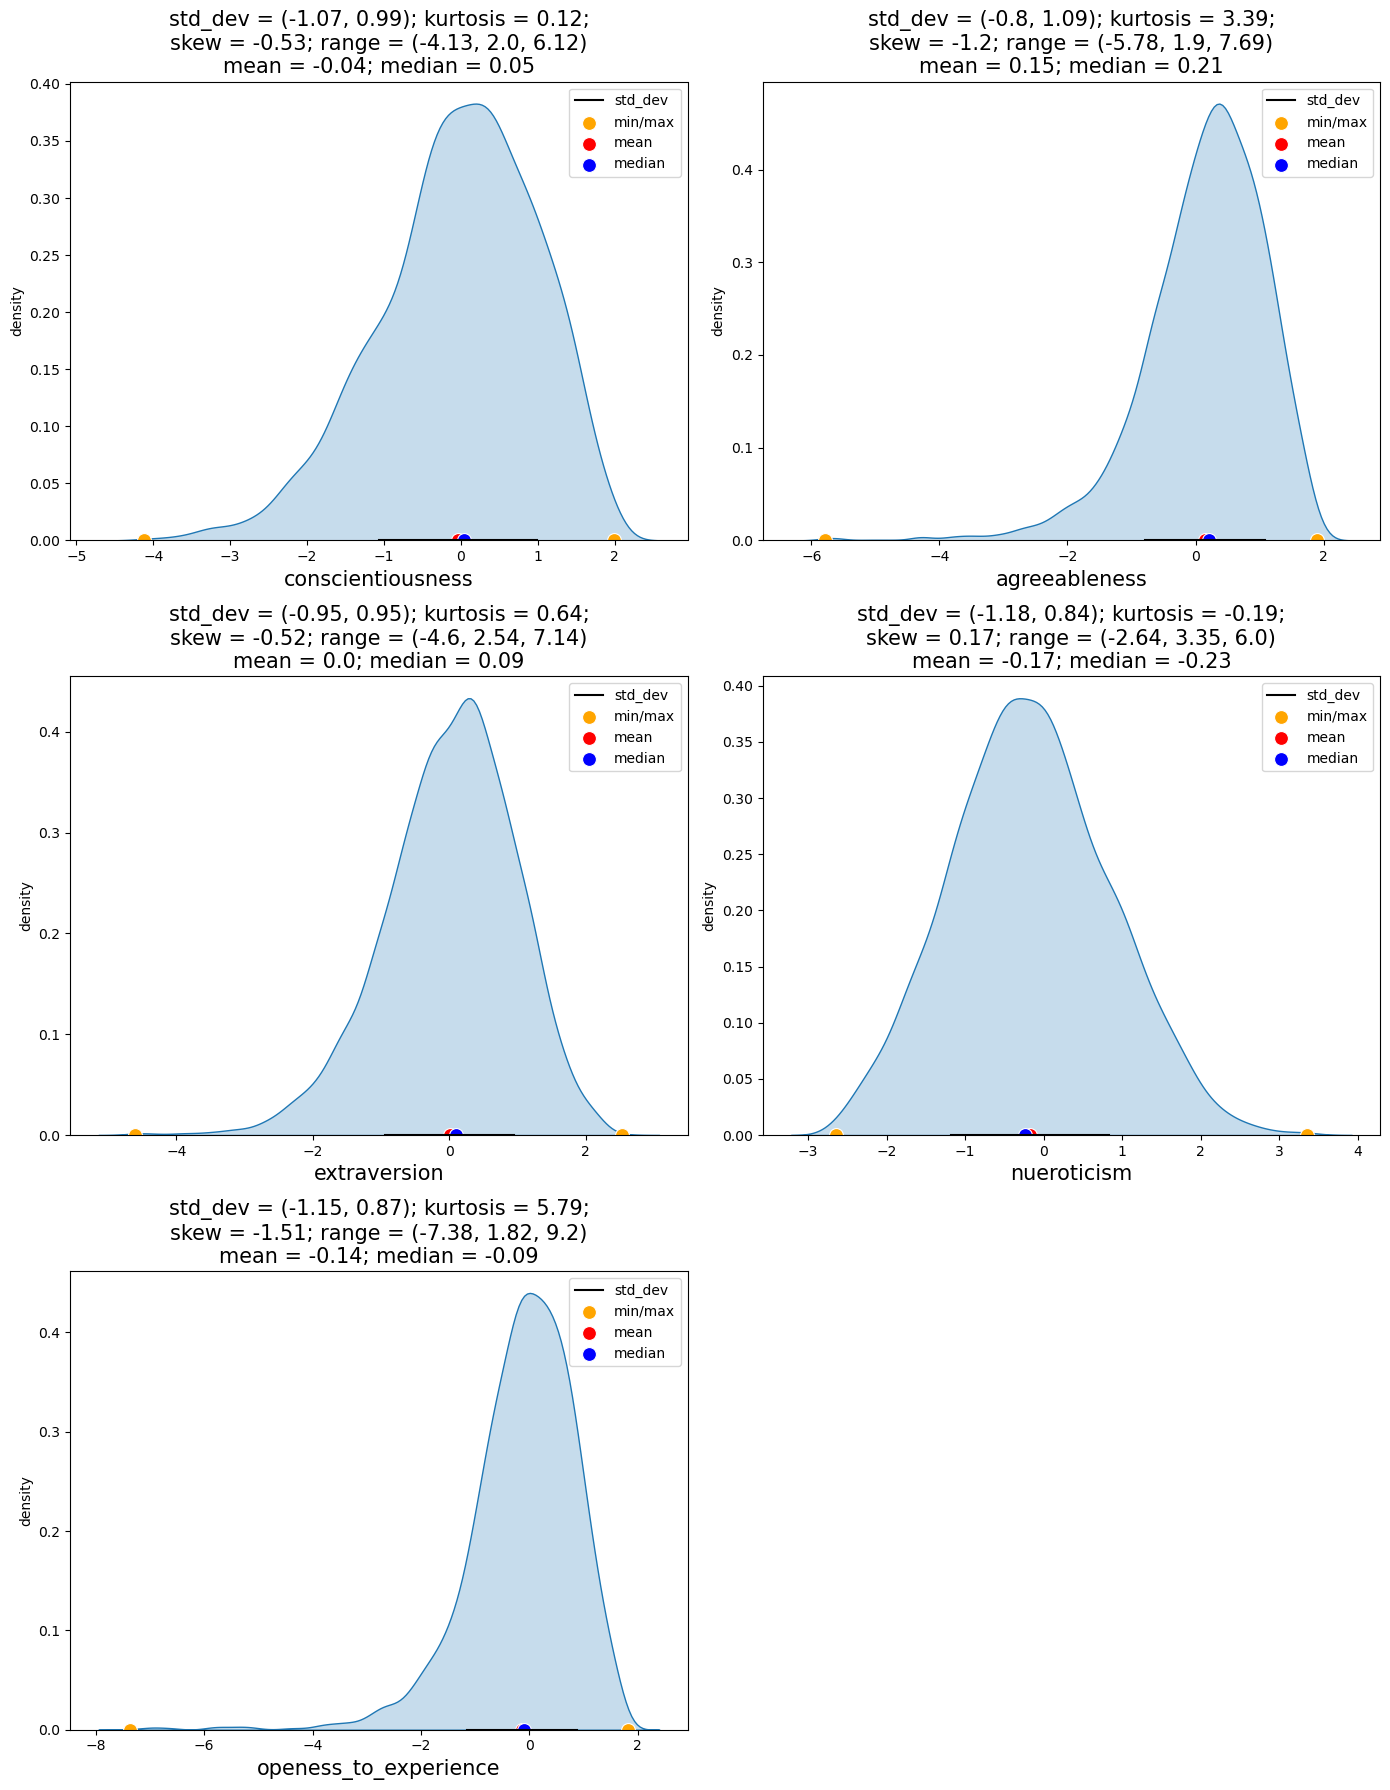

In [45]:
UVA_numeric(numerical_columns, ['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience'])

### Box plot of the numerical columns

In [46]:
def UVA_outlier(data, var_group, include_outlier=True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    '''

    size = len(var_group)
    nrows = (size + 1) // 2  # Calculate number of rows needed
    plt.figure(figsize=(14, 6 * nrows), dpi=100)

    # looping for each variable
    for j, i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = med - (1.5 * IQR)
        whis_high = med + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        if include_outlier:
            # Plotting the variable with every information
            plt.subplot(nrows, 2, j + 1)
            sns.boxplot(y=data[i], orient="v")  # Use y instead of x
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))

        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group].copy()
            data2[i][data2[i] > whis_high] = whis_high + 1
            data2[i][data2[i] < whis_low] = whis_low - 1

            # plotting without outliers
            plt.subplot(nrows, 2, j + 1)
            sns.boxplot(y=data2[i], orient="v")  # Use y instead of x
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ),fontsize=14)

    plt.tight_layout()
    plt.show()

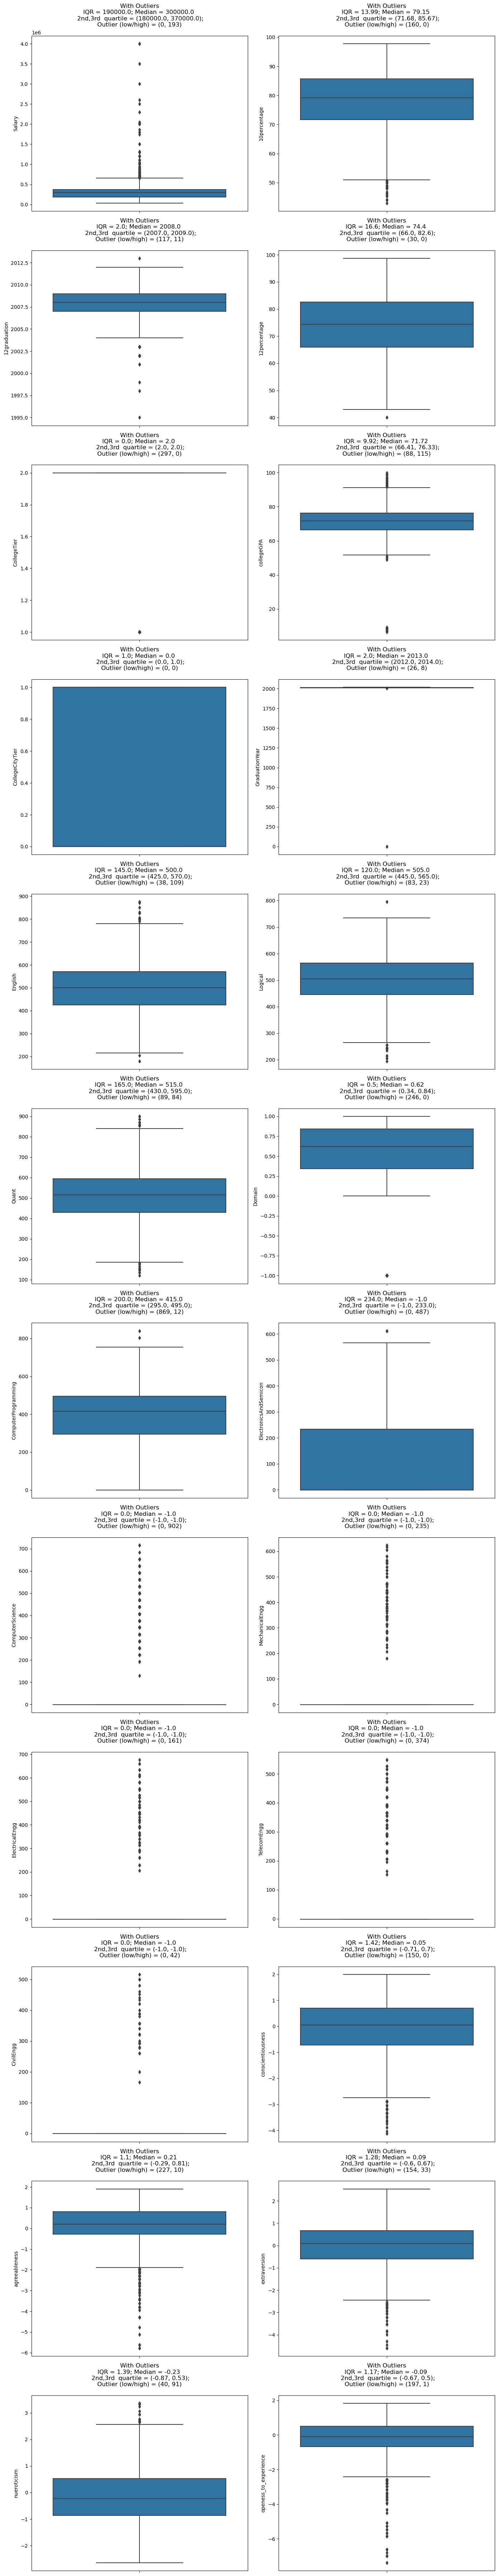

In [47]:
UVA_outlier(numerical_columns,numerical_columns.columns)

### Observation: 
   * **Salary:** From the box plot of the Salary column we have see that very high outliers present. The Max value is 4000000, and the 3rd quartile is 370000. The Difference is very huge between 100 percentile and 3rd quartile. And Salary mainly lies between 180000 to 370000. so, we will remove the outliers present in the data.
   * **10percentage:** The 10percentage columns the median value is 79.15 some students get the below 50 percentage in 10 class. And the 10percentage most percentage lies between 71.68 to 85.67.
   * **12percentage:** The 12percentage columns looks like a normal distribution but it not properly normal distributin because one student get the 40 percentage in 12 class. And the 12percentage most percentage lies between 66 to 82.6%
   * **collegeGPA:** The CollegeGPA coloumns follows a long tail towards left. This indicates that the most of the student get low score in the College GPA. And the CollegeGPA most of the gpa is lies between 66.41 to 76.33 .
   * **Domain:** The column appears to consist of whole numeric values that are standardized. The presence of "-1" values in the data suggests that some individuals did not fill in their scores for the AMCAT's domain module, resulting in missing values represented by "-1". To handle this, we can replace these "-1" values with the median value of the column, effectively imputing missing scores with a central tendency measure.
   * **ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg:** These columns contain "-1" values, which likely represent missing or unknown data. To standardize the representation of missing values, we will replace these "-1" values with "0. 

In [48]:
data["Domain"].replace(-1,data["Domain"].median(),inplace=True)
lst = ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
for i in lst:
    data[i].replace(-1,0,inplace=True)

In [49]:
### We will filter the data with 95 percentil of the salary data. so it will remove the outliers.
# data = data[data['Salary'] <= data['Salary'].quantile(0.95)]

In [50]:
data.shape

(3998, 35)

<AxesSubplot:>

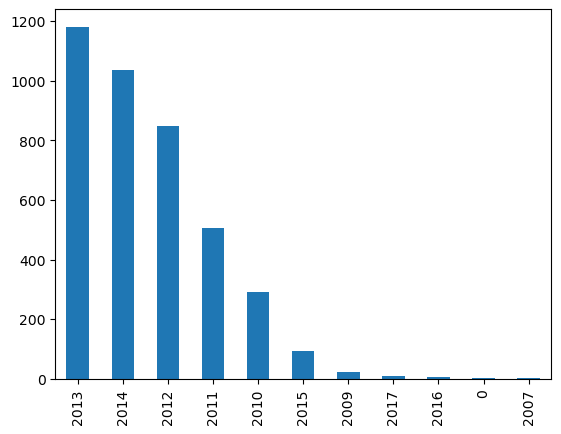

In [51]:
### Distribution of the Graduation Year.
data['GraduationYear'].value_counts().plot(kind='bar')

#### This hisogram tells about the most of the employee's are passed out in year 2013 in Graduation Year

<AxesSubplot:>

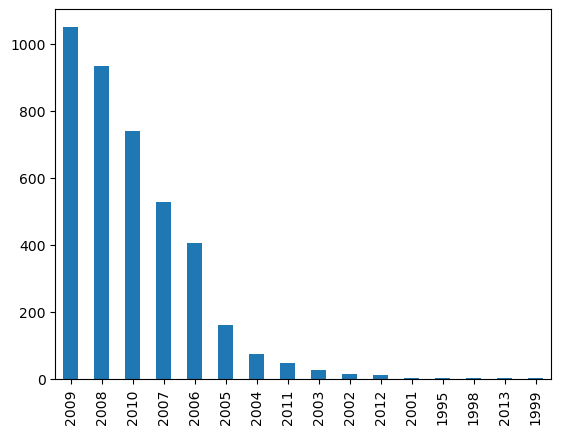

In [52]:
# Distribution of the 12graduation Year.
data['12graduation'].value_counts().plot(kind='bar')

#### This bar plot tells about the most of the employee's are passed out in year 2009 in 12graduation

## BI-Variate Analysis

### a. Continuous vs Continuous Numerical Data

#### Correlation Matrix

In [53]:
data.corr()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Salary,1.000000,0.177373,-0.161383,0.170254,-0.179332,0.130103,0.015384,-0.010053,0.178219,0.179275,...,-0.100674,0.018493,-0.047578,-0.022671,0.037648,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.177373,1.000000,0.269957,0.643378,-0.126042,0.312538,0.116707,-0.013799,0.350780,0.316014,...,-0.018892,0.050397,0.074427,0.049393,0.030012,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,-0.161383,0.269957,1.000000,0.259166,0.027691,0.086001,-0.003016,0.014457,0.147925,0.105887,...,0.293405,0.035465,0.123735,0.023480,-0.004725,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.170254,0.643378,0.259166,1.000000,-0.100771,0.346137,0.130462,-0.012933,0.212888,0.243571,...,-0.043497,0.037663,0.064008,0.044232,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeTier,-0.179332,-0.126042,0.027691,-0.100771,1.000000,-0.086781,-0.101494,-0.005557,-0.183843,-0.182811,...,0.001023,-0.021574,0.002589,-0.000018,-0.033739,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.130103,0.312538,0.086001,0.346137,-0.086781,1.000000,0.017471,0.008706,0.106478,0.196610,...,0.007634,-0.031729,0.052271,-0.005186,-0.018925,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityTier,0.015384,0.116707,-0.003016,0.130462,-0.101494,0.017471,1.000000,0.008152,0.050462,0.020353,...,-0.010652,-0.052398,0.010305,0.049883,-0.033399,0.014763,0.005565,-0.008203,0.004442,-0.016790
GraduationYear,-0.010053,-0.013799,0.014457,-0.012933,-0.005557,0.008706,0.008152,1.000000,-0.024089,-0.024018,...,0.024086,-0.066852,0.008524,0.004225,0.001696,-0.013235,-0.002877,0.008397,-0.000417,0.016855
English,0.178219,0.350780,0.147925,0.212888,-0.183843,0.106478,0.050462,-0.024089,1.000000,0.444357,...,0.059568,-0.002460,0.032454,-0.005795,-0.007708,0.034943,0.194990,0.018755,-0.155528,0.067979
Logical,0.179275,0.316014,0.105887,0.243571,-0.182811,0.196610,0.020353,-0.024018,0.444357,1.000000,...,0.044564,-0.009829,0.012029,-0.012908,-0.011267,0.025876,0.167207,-0.006949,-0.178781,0.048420


In [54]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

#### 1. Is there a higher salary for those with a higher college GPA?

<AxesSubplot:xlabel='Salary', ylabel='collegeGPA'>

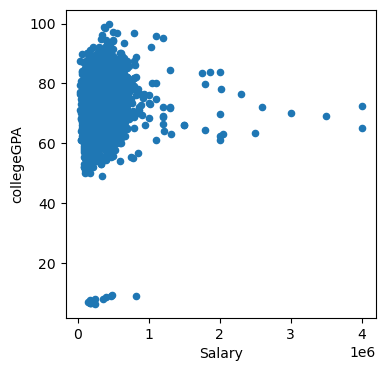

In [55]:
data.plot(kind='scatter', x='Salary', y='collegeGPA', figsize=(4, 4))

*  Here we can see that the their is no relationship between Salary and CollegeGPA.
* In Salary Columns we have outliers present. So, that could be the reason for no relation.
* We can say that a higher college GPA not correlates with a higher salary.

### b. Continuous vs Categorical Data

 #### 1. Is there a difference in salary based on gender?

In [56]:
data['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Salary'}, xlabel='Gender'>

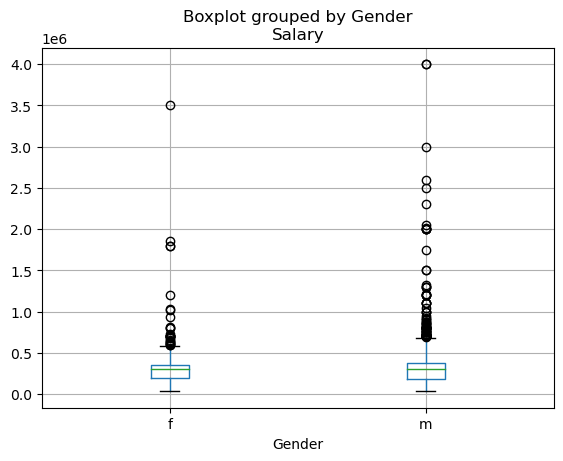

In [57]:
data.boxplot(by='Gender', column='Salary')

* Here we can see that the there are many outliers in the salary data
* There is not much difference between median salary for both genders.
* We can also observe male have more outliers indicating they are more people getting higher pays in male than female category.

#### 2. Is there a difference in salary based on Degree?

<AxesSubplot:title={'center':'Salary'}, xlabel='Degree'>

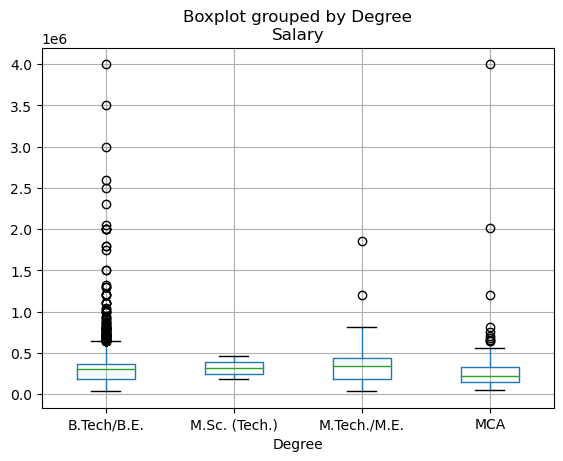

In [58]:
data.boxplot(by='Degree', column='Salary')

* Here we can see that the there are many outliers in the Salary data
* From the above box plot, we see that the B.Tech/B.E. and M.Tech./M.E. Degree People are getting high Salary Compared to Others.
* There is not much difference between median salary for Degree.

#### 3. Is there a difference in salary based on Specialization?

<AxesSubplot:title={'center':'Salary'}, xlabel='Specialization'>

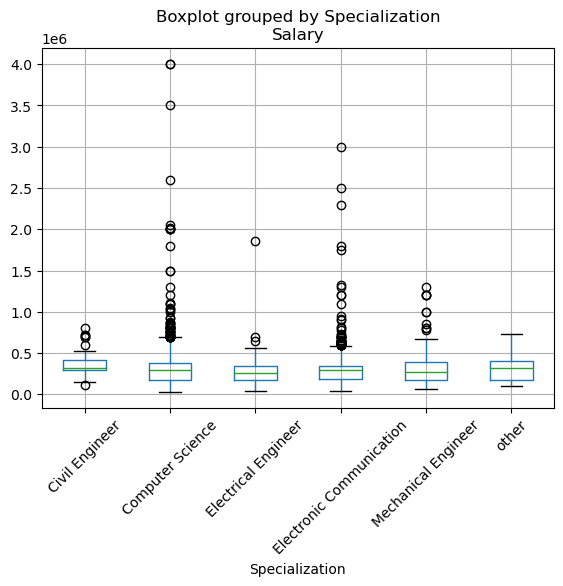

In [59]:
data.boxplot(by='Specialization',column='Salary',rot=45)

* Here we can see that the there are many outliers in the Salary data
* From these box plot we see that the `Computer Science` are getting higher Salary then others.
* There is not much difference between median salary for Specialization.

#### 4. Is there a difference in salary based on CollegeState?

<AxesSubplot:title={'center':'Salary'}, xlabel='CollegeState'>

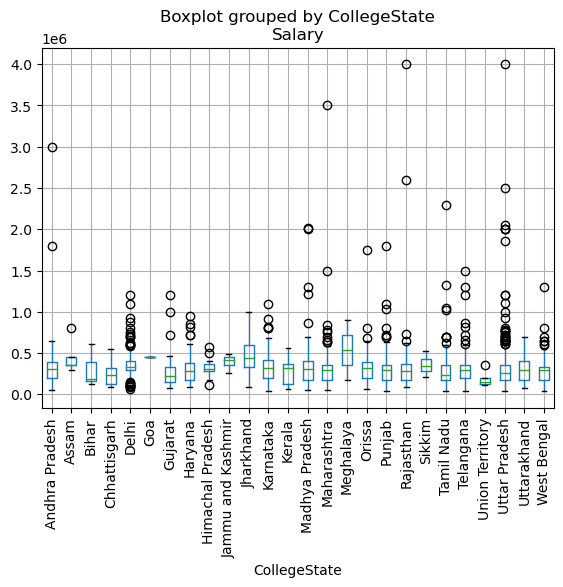

In [60]:
data.boxplot(by="CollegeState",column="Salary", rot=90)

* Here we can see that the there are many outliers in the Salary data
* Here we see that the `Andhra Pradesh, Maharashtra, Tamil Rajasthan, Uttar Pradesh` are getting a high salary then others college State.

In [61]:
categorical_columns.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

### c. Categorical vs categorical data.

In [62]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
    
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
        # Set legend outside the plot
  plt.legend(title=tar, bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))

    # Set legend outside the plot
  plt.legend(title=tar, bbox_to_anchor=(1.05, 1), loc='upper left')
  int_level = data[cat].value_counts()

#### 1. Does the preference of Specialisation depend on the Gender?

In [63]:
# # data.groupby(['Specialization', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
# tab = pd.crosstab(data['Specialization'], data['Gender'], normalize='index')

# tab.plot(kind='bar')

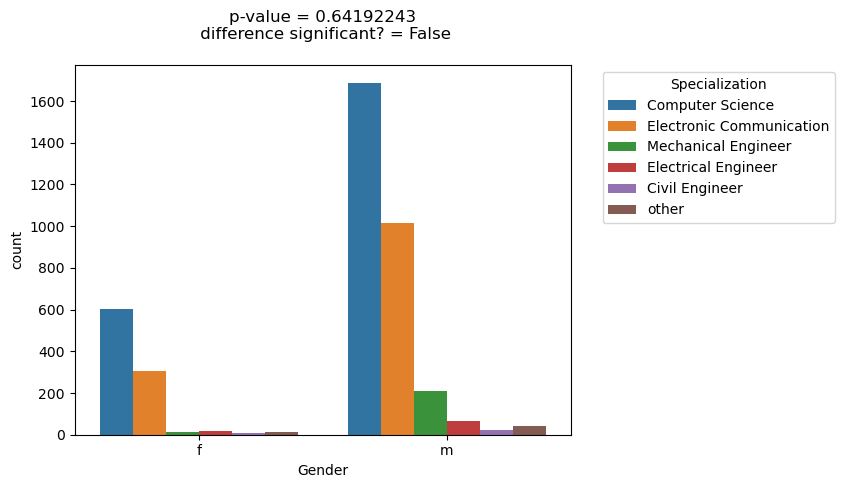

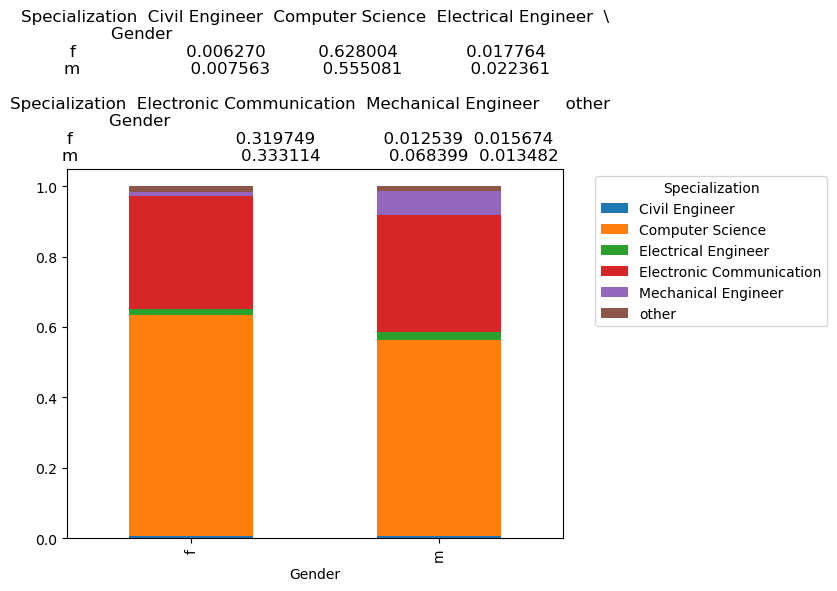

In [64]:
BVA_categorical_plot(data, 'Specialization', 'Gender')

* Here we can see that the Specialisation doesn't have any significant effect on the gender. So, There is no evidence to suggest that the preference of specialization depends on gender.

#### 2. Does the preference of Degree depend on the Gender?

In [65]:
# tab = pd.crosstab(data['Degree'], data['Gender'], normalize='index')

# tab.plot(kind='bar')

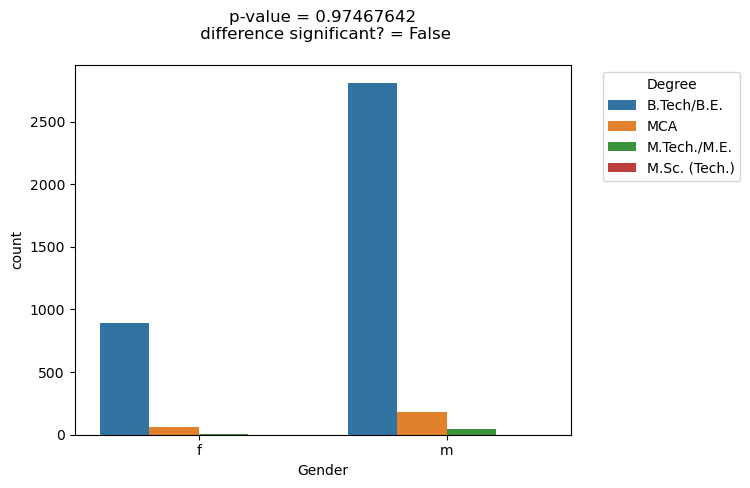

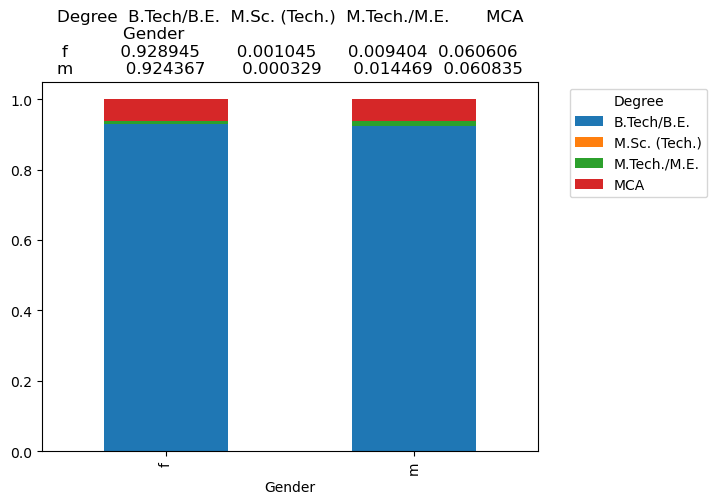

In [66]:
BVA_categorical_plot(data, 'Degree', 'Gender')

* There is no significant difference between Gender and Degree. So, there is no evidence to suggest that the Degree depends on gender.

In [67]:
# tab = pd.crosstab(data['CollegeState'], data['Gender'], normalize='index')

# tab.plot(kind='bar')

#### 3. Does the preference of CollegeState depend on the Gender?

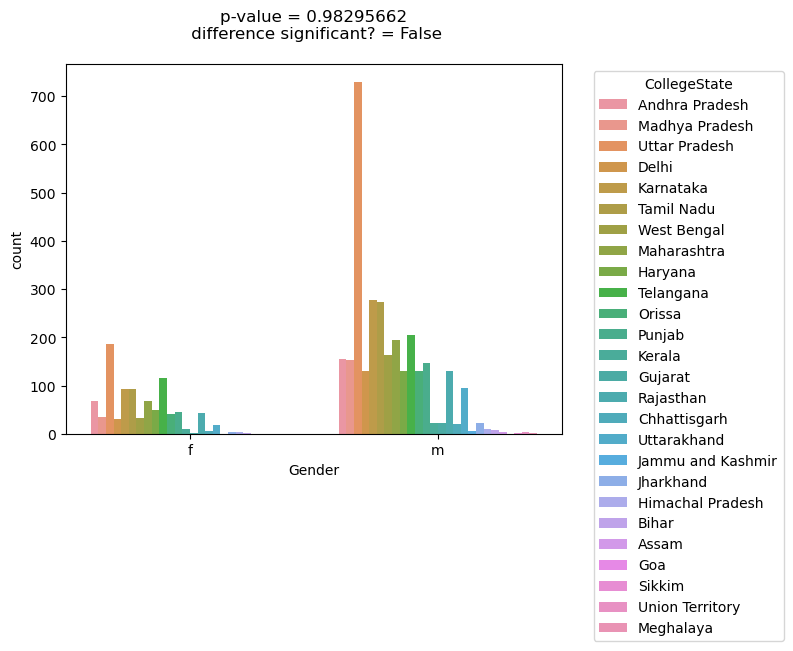

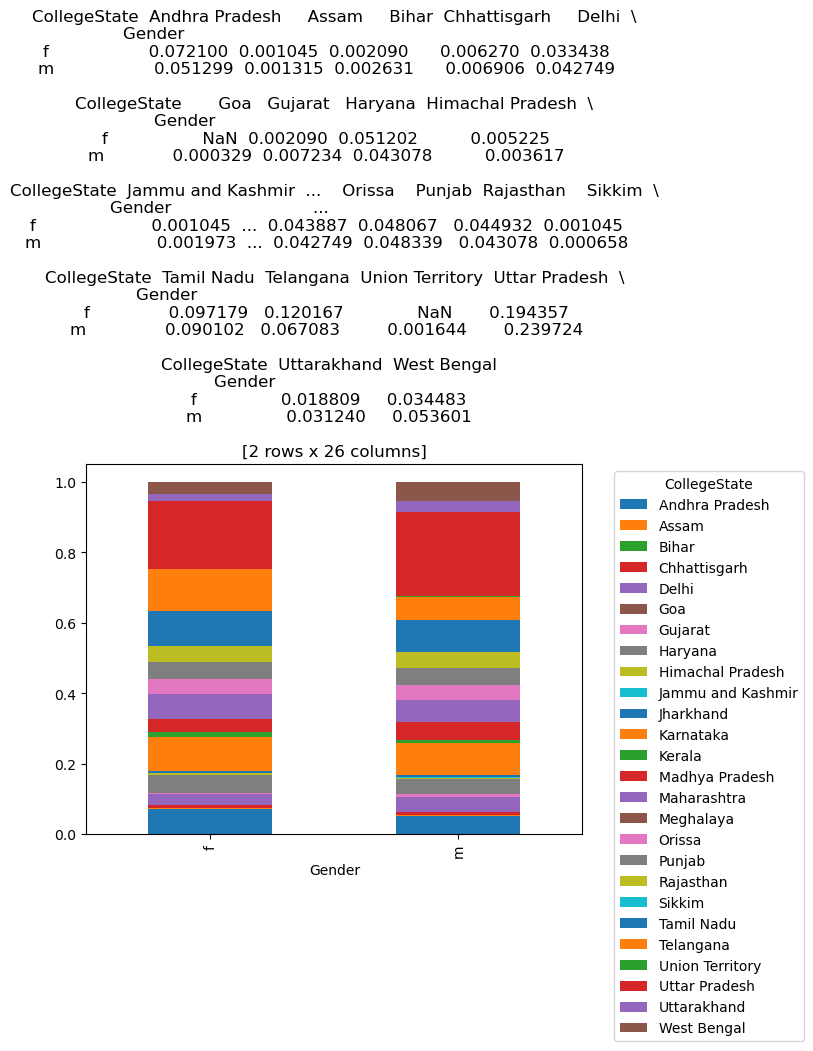

In [68]:
BVA_categorical_plot(data, 'CollegeState', 'Gender')

* Here we can see that the College State doesn't have significant effect on the gender. So, there is no evidence to suggest that the preference of College State depends on gender.

### Q1. -	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [69]:
research_data=data[(data["Designation"]=="programmer analyst")|(data["Designation"]=="Software Engineer")|(data["Designation"]=="hardware engineer")
       |(data["Designation"]=="associate engineer")]
research_data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3,1100000,2011-07-01,2024-02-22 23:36:44.661308,Software Engineer,Gurgaon,m,1989-12-05,85.60,CBSE Board,2007,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00.000000,Software Engineer,Manesar,m,1991-02-27,78.00,CBSE Board,2008,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
6,300000,2014-08-01,2015-05-01 00:00:00.000000,Software Engineer,Bangalore,m,1993-02-01,86.08,State Board,2010,...,346,0,0,0,0,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
14,300000,2013-07-01,2024-02-22 23:36:44.661308,Software Engineer,Bangalore,m,1992-07-02,81.20,State Board,2008,...,376,0,0,0,0,0.7027,0.7119,0.0100,-0.99500,0.6721
19,325000,2014-09-01,2024-02-22 23:36:44.661308,Software Engineer,Pune,f,1990-11-30,79.00,CBSE Board,2008,...,0,0,0,0,0,0.8192,0.2668,-0.2714,-0.40780,-0.1295


In [70]:
import random
n=50

## extract the sample of the salary with 40 sample.
salary_sample=random.sample(research_data['Salary'].tolist(),n)
print(salary_sample)

[500000, 100000, 320000, 360000, 220000, 310000, 215000, 300000, 415000, 345000, 400000, 380000, 465000, 350000, 460000, 300000, 145000, 450000, 145000, 300000, 100000, 375000, 350000, 450000, 240000, 450000, 300000, 200000, 395000, 335000, 480000, 325000, 140000, 200000, 345000, 80000, 230000, 300000, 420000, 215000, 455000, 500000, 220000, 400000, 300000, 250000, 250000, 335000, 300000, 305000]


#### Here, we don't have population standard deviation, so we use t_score.

In [71]:
# t_score for sampling distributions
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    num = sample_mean - pop_mean
    deno = sample_std / sample_size**0.5
    return num / deno

# z_score for sampling distributions

# def z_score(sample_size, sample_mean, pop_mean, pop_std):
#     numerator = sample_mean - pop_mean
#     denomenator = pop_std / sample_size**0.5
#     return numerator / denomenator

In [72]:
import statistics
from scipy.stats import t,norm

In [73]:
## Calculate the sample mean
sample_mean=sum(salary_sample)/len(salary_sample)

In [74]:
## Calculate the sample standard deviation
sample_std=statistics.stdev(salary_sample)

In [75]:
sample_size = 100
# sample_mean = sample_mean
pop_mean = 300000.0
# sample_std=82418.47

In [76]:
# Calculating the t-score

t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t_value)

1.3170022865712623


In [77]:
# Two Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(t_critical)

1.959963984540054


Text(314500.0, 0.0007, 'x_bar')

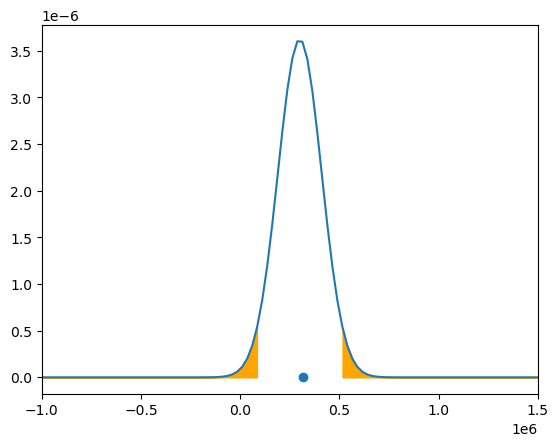

In [78]:
x_min = -1000000
x_max = 1500000

mean = pop_mean
std = sample_std 

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


In [79]:
if(np.abs(t_value) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [80]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("*"*15, "Report","*"*15)
    print("Reject Null Hypothesis")
    print("*"*15, "Final Conclusion", "*"*15)
    print("There is a enough evidence to conclude that the, After doing your computer science engineering if you take up jobs as a programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn upto 2.5-3 lakhs as a fresher graduate.")
else:
    print("Fail to reject Null Hypothesis")
    print("*"*15, "Final Conclusion", "*"*15)
    print("There is not enough evidence to conclude that the After doing your computer science engineering if you take up jobs as a programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn upto 2.5-3 lakhs as a fresher graduate.")

p_value =  0.18783785811153697
Fail to reject Null Hypothesis
*************** Final Conclusion ***************
There is not enough evidence to conclude that the After doing your computer science engineering if you take up jobs as a programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn upto 2.5-3 lakhs as a fresher graduate.


### Conclusion: From this Hypothesis test we get an strong avidence that After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate